In [5]:
#STANDARD IMPORTS
import pandas as pd
import imblearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

#IMPORTS FOR THE MULTICLASS SMOTE
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

C:\Users\flytr\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [22]:
df = pd.read_csv(r"C:\Users\flytr\Downloads\PFAS_Stats_Final_Df.csv")
df.head()

,location,latitude,longitude,value,RAW_D_MINOR_Q1,RAW_D_INCOME_Q1,RAW_D_LESSHS_Q1,RAW_D_UNEMPLOYED_Q1,RAW_D_INDEX_Q1,S_D_MINOR_PER_Q1,...,S_D_INCOME_PER_N,S_D_LESSHS_PER_N,S_D_UNEMPLOYED_PER_N,S_D_INDEX_PER_N,N_D_MINOR_PER_N,N_D_INCOME_PER_N,N_D_LESSHS_PER_N,N_D_UNEMPLOYED_PER_N,N_D_INDEX_PER_N,totalPop_N
0,USGS-322658085465001,32.449306,-85.779667,0.0,78.0,23.0,11.0,8.0,54.0,83.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
1,USGS-323908086360201,32.651861,-86.600694,0.0,20.0,35.0,14.0,4.0,28.0,40.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,USGS-325159086423801,32.866500,-86.710528,0.0,7.0,44.0,15.0,3.0,26.0,17.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
3,USGS-332630087430001,33.442611,-87.714722,0.0,1.0,12.0,8.0,0.0,7.0,5.0,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
4,USGS-332833086203001,33.475940,-86.341645,0.0,6.0,33.0,8.0,0.0,20.0,16.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0


In [23]:
df = df[['value','RAW_D_MINOR_MEAN',
'RAW_D_INCOME_MEAN',
'RAW_D_LESSHS_MEAN',
'RAW_D_UNEMPLOYED_MEAN',
'RAW_D_INDEX_MEAN']]

In [25]:
quart = 9.235
med = 29.760
upper = 83.750



In [27]:
df.loc[df['value'] < quart, 'value'] = 1
df

,value,RAW_D_MINOR_MEAN,RAW_D_INCOME_MEAN,RAW_D_LESSHS_MEAN,RAW_D_UNEMPLOYED_MEAN,RAW_D_INDEX_MEAN
0,1.000,80.666667,32.285714,11.000000,14.809524,56.476190
1,1.000,20.000000,35.000000,14.000000,4.000000,28.000000
2,1.000,11.619048,42.571429,15.047619,4.523810,27.380952
3,1.000,1.000000,12.000000,8.000000,0.000000,7.000000
4,1.000,6.240000,32.120000,8.960000,2.320000,19.160000
5,1.000,16.809524,24.095238,14.809524,0.523810,20.476190
6,1.000,14.782609,9.086957,1.434783,3.956522,11.956522
7,1.000,43.214286,46.071429,16.142857,4.642857,44.214286
8,1.000,39.000000,6.909091,6.636364,1.181818,22.545455
9,1.000,78.000000,56.000000,26.000000,18.000000,67.000000


In [28]:
df.loc[(df['value'] >= quart) & (df['value'] <= med), 'value'] = 2
df

,value,RAW_D_MINOR_MEAN,RAW_D_INCOME_MEAN,RAW_D_LESSHS_MEAN,RAW_D_UNEMPLOYED_MEAN,RAW_D_INDEX_MEAN
0,1.000,80.666667,32.285714,11.000000,14.809524,56.476190
1,1.000,20.000000,35.000000,14.000000,4.000000,28.000000
2,1.000,11.619048,42.571429,15.047619,4.523810,27.380952
3,1.000,1.000000,12.000000,8.000000,0.000000,7.000000
4,1.000,6.240000,32.120000,8.960000,2.320000,19.160000
5,1.000,16.809524,24.095238,14.809524,0.523810,20.476190
6,1.000,14.782609,9.086957,1.434783,3.956522,11.956522
7,1.000,43.214286,46.071429,16.142857,4.642857,44.214286
8,1.000,39.000000,6.909091,6.636364,1.181818,22.545455
9,1.000,78.000000,56.000000,26.000000,18.000000,67.000000


In [29]:
df.loc[(df['value'] >= med) & (df['value'] <= upper), 'value'] = 3
df

,value,RAW_D_MINOR_MEAN,RAW_D_INCOME_MEAN,RAW_D_LESSHS_MEAN,RAW_D_UNEMPLOYED_MEAN,RAW_D_INDEX_MEAN
0,1.000,80.666667,32.285714,11.000000,14.809524,56.476190
1,1.000,20.000000,35.000000,14.000000,4.000000,28.000000
2,1.000,11.619048,42.571429,15.047619,4.523810,27.380952
3,1.000,1.000000,12.000000,8.000000,0.000000,7.000000
4,1.000,6.240000,32.120000,8.960000,2.320000,19.160000
5,1.000,16.809524,24.095238,14.809524,0.523810,20.476190
6,1.000,14.782609,9.086957,1.434783,3.956522,11.956522
7,1.000,43.214286,46.071429,16.142857,4.642857,44.214286
8,1.000,39.000000,6.909091,6.636364,1.181818,22.545455
9,1.000,78.000000,56.000000,26.000000,18.000000,67.000000


In [31]:
df.loc[df['value'] > upper,'value'] = 4
df

,value,RAW_D_MINOR_MEAN,RAW_D_INCOME_MEAN,RAW_D_LESSHS_MEAN,RAW_D_UNEMPLOYED_MEAN,RAW_D_INDEX_MEAN
0,1.0,80.666667,32.285714,11.000000,14.809524,56.476190
1,1.0,20.000000,35.000000,14.000000,4.000000,28.000000
2,1.0,11.619048,42.571429,15.047619,4.523810,27.380952
3,1.0,1.000000,12.000000,8.000000,0.000000,7.000000
4,1.0,6.240000,32.120000,8.960000,2.320000,19.160000
5,1.0,16.809524,24.095238,14.809524,0.523810,20.476190
6,1.0,14.782609,9.086957,1.434783,3.956522,11.956522
7,1.0,43.214286,46.071429,16.142857,4.642857,44.214286
8,1.0,39.000000,6.909091,6.636364,1.181818,22.545455
9,1.0,78.000000,56.000000,26.000000,18.000000,67.000000


In [32]:
df.dropna()
df.head()

,value,RAW_D_MINOR_MEAN,RAW_D_INCOME_MEAN,RAW_D_LESSHS_MEAN,RAW_D_UNEMPLOYED_MEAN,RAW_D_INDEX_MEAN
0,1.0,80.666667,32.285714,11.000000,14.809524,56.476190
1,1.0,20.000000,35.000000,14.000000,4.000000,28.000000
2,1.0,11.619048,42.571429,15.047619,4.523810,27.380952
3,1.0,1.000000,12.000000,8.000000,0.000000,7.000000
4,1.0,6.240000,32.120000,8.960000,2.320000,19.160000


In [33]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [34]:
X = df.loc[:,df.columns!="value"]
y = df['value']

Class=1, n=1980 (88.314%)
Class=4, n=93 (4.148%)
Class=2, n=86 (3.836%)
Class=3, n=83 (3.702%)


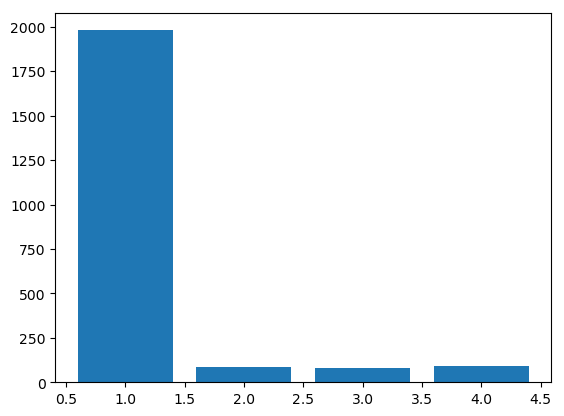

In [35]:
#SHOWS THE IMBALANCE IN THE DATASET
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=1980 (25.000%)
Class=4, n=1980 (25.000%)
Class=2, n=1980 (25.000%)
Class=3, n=1980 (25.000%)


C:\Users\flytr\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\flytr\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\flytr\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\flytr\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


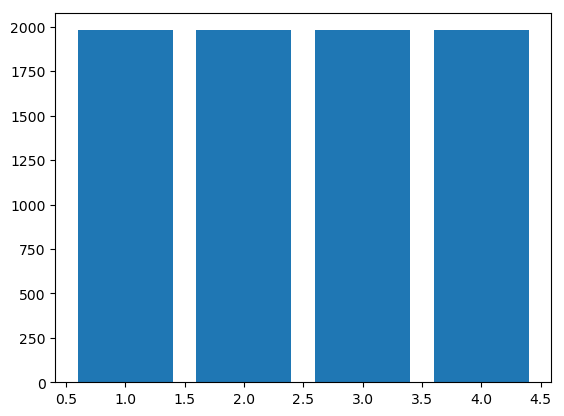

In [36]:
#BALANCING THE DATASET USING SMOTE METHOD--> OVERSAMPLING ALL VALUES USING SMOTE TO CREATE NEW X, y (DOES NOT CHANGE OG DF)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#GRAPHICALLY DESCRIBING
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
rbf = svm.SVC(kernel='rbf',gamma = 0.5, C=0.1).fit(X_train_std,y_train)
poly = svm.SVC(kernel='poly',degree = 3, C=1).fit(X_train_std, y_train)

In [38]:
#TO CALCULATE EFFICIENCY OF MODEL
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [39]:
#CALCULATING ACCURACY OF THE POLYNOMIAL MODEL
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  33.33
F1 (Polynomial Kernel):  28.24


In [40]:
#CALCULATING ACCURACY OF RBF MODEL
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  25.06
F1 (RBF Kernel):  10.05


C:\Users\flytr\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
